### Importing important libraries

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,mean_squared_error,mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

### Loading the 'kc_house_data.csv' file into a pandas DataFrame

In [78]:
df = pd.read_csv("kc_house_data.csv")
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


# Exploring the DataSet

We are trying to explore the relationship between some characteristics of and the price of houses. In this case, we may need to pick up the most important features and study them carefully. 

As we briefly looking to our data we may see an interesting bond between the price of houses and its size. Well, that's obvious but by using of some machine learning we may find an equation to predect houses's price .

# data preprocessing phase

We can see that we need to clean up some columns of this dataframe as a part of the preprocessing phase 

In [26]:
# bathrooms column should contain only integers so we will use round() function to fix it 
df['bathrooms'] = df['bathrooms'].round().astype(int)
# Chaning the type of other columns
df['floors'] = df['floors'].astype(int) 
df['price'] = df['price'].astype(int)  
df['sqft_living'] = df['sqft_living'].astype(int)

In [27]:
# Checking if DataSet contains some NaN values 
df.isnull().sum().sum()

0

In [28]:
# Some cleaning to the date column
for i in range(len(df['date'])):
    df['date'][i] = df['date'][i][:8] 

<ipython-input-28-5450baa07e98>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'][i] = df['date'][i][:8]


In [29]:
# Dropping date column into more usefull columns 
dateTime=pd.DatetimeIndex(df.date)
df['year']=dateTime.year
df['month']=dateTime.month
df['day']=dateTime.day
df.drop(columns=['date'],inplace=True)
df.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'year', 'month', 'day'],
      dtype='object')

In [30]:
# droppng id column "Not important"
df.drop('id',inplace=True,axis=1)

In [31]:
# checking the DataSet after the cleaning phase :
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
0,221900,3,1,1180,5650,1,0,0,3,7,...,1955,0,98178,47.5112,-122.257,1340,5650,2014,10,13
1,538000,3,2,2570,7242,2,0,0,3,7,...,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12,9
2,180000,2,1,770,10000,1,0,0,3,6,...,1933,0,98028,47.7379,-122.233,2720,8062,2015,2,25
3,604000,4,3,1960,5000,1,0,0,5,7,...,1965,0,98136,47.5208,-122.393,1360,5000,2014,12,9
4,510000,3,2,1680,8080,1,0,0,3,8,...,1987,0,98074,47.6168,-122.045,1800,7503,2015,2,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000,3,2,1530,1131,3,0,0,3,8,...,2009,0,98103,47.6993,-122.346,1530,1509,2014,5,21
21609,400000,4,2,2310,5813,2,0,0,3,8,...,2014,0,98146,47.5107,-122.362,1830,7200,2015,2,23
21610,402101,2,1,1020,1350,2,0,0,3,7,...,2009,0,98144,47.5944,-122.299,1020,2007,2014,6,23
21611,400000,3,2,1600,2388,2,0,0,3,8,...,2004,0,98027,47.5345,-122.069,1410,1287,2015,1,16


# data visualization phase

First of we start by showing the density of prices

<AxesSubplot:xlabel='price', ylabel='Count'>

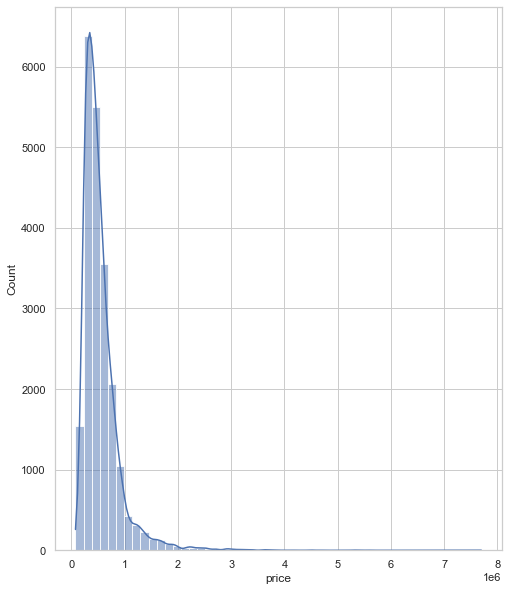

In [32]:
plt.figure(figsize=(8,10))
sns.histplot(df['price'], kde=True ,bins=50)

### The heatmap

It shows us the most important features to work on by looking at the price row and see numbers,  
these numbers represent the correlation between the price and other features, the closer to 1 the better.

<AxesSubplot:>

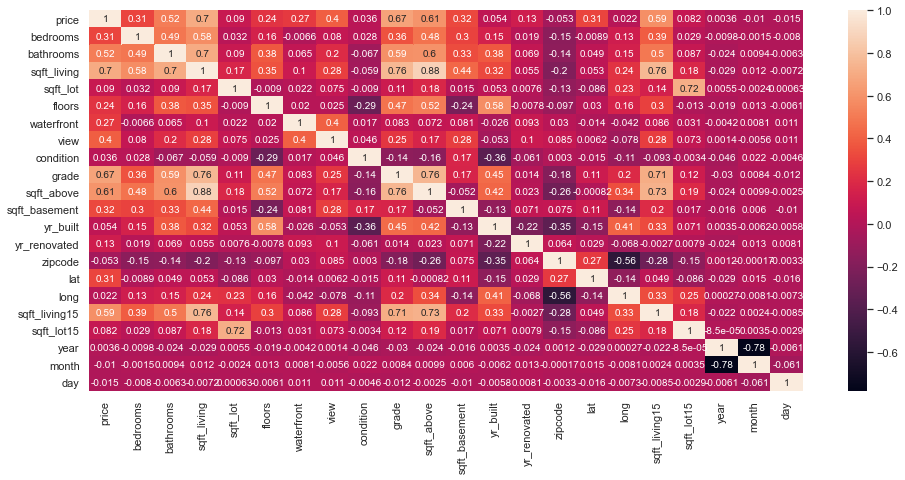

In [33]:
plt.figure(figsize=(16,7))
sns.heatmap(df.corr(),annot=True)

After seeing the heatmap we can say that there is a strong bond between price and some features such as :
    grade, sqft_above, sqft_living, bathrooms

### Now let's see how prices have changed over the years

<AxesSubplot:xlabel='yr_built', ylabel='price'>

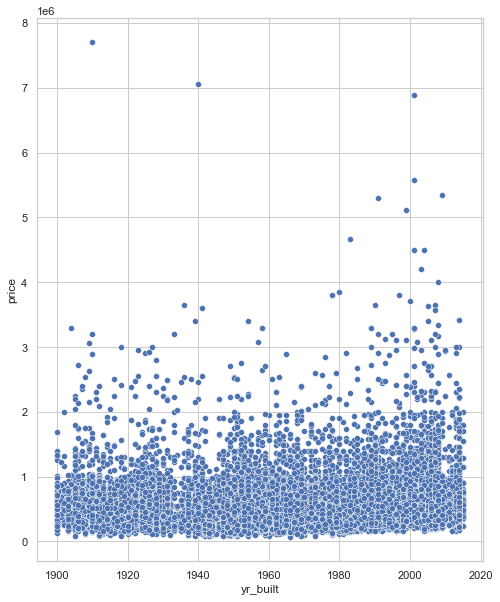

In [34]:
plt.figure(figsize=(8,10))
sns.scatterplot(x='yr_built',y='price',data=df)

### And that's a linear graph showing the increase of prices

<AxesSubplot:xlabel='year', ylabel='price'>

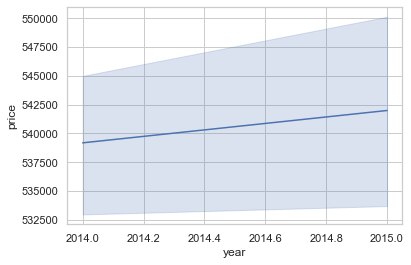

In [35]:
sns.lineplot(x='year', y='price', data=df)

### Let's see the relationship between the size and prices

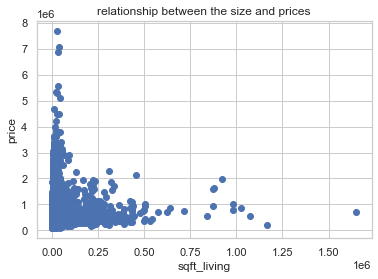

In [36]:
plt.title('relationship between the size and prices')
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.scatter(df.sqft_lot, df.price)

### Number of bathrooms and prices

<AxesSubplot:xlabel='bathrooms', ylabel='price'>

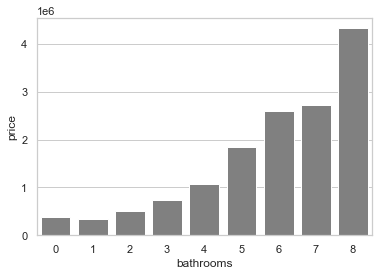

In [37]:
sns.set_theme(style="whitegrid")
sns.barplot(x='bathrooms', y='price', data=df, ci=None, color='grey')

### Some other feature

<AxesSubplot:xlabel='waterfront', ylabel='price'>

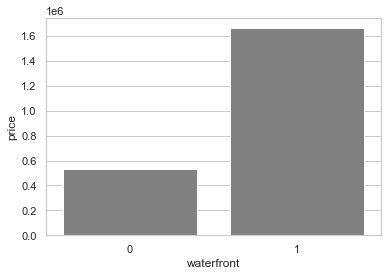

In [38]:
sns.set_theme(style="whitegrid")
sns.barplot(x='waterfront', y='price', data=df, ci=None, color='grey')

# Splitting Data

In [39]:
from sklearn.model_selection import train_test_split

x = df['sqft_living'].values

y = df['price'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=30)

# Creating the module

In [59]:
from sklearn import linear_model , metrics
from sklearn.metrics import mean_squared_error, r2_score

In [77]:
lr = LinearRegression()#build linear regression model
lr.fit(x_train, y_train) #fitting the training data
pred_lr = lr.predict(x_test) #testing our model’s performance

## Linear Regression plot

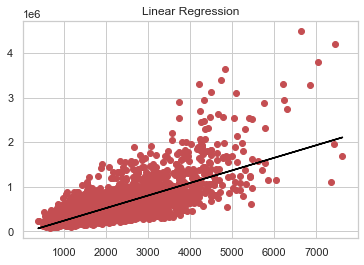

In [42]:
plt.scatter(x_test, y_test,color="r")
plt.title("Linear Regression")
plt.plot(x_test, pred_lr,color='black')
plt.show()

In [50]:
print('Module score = ', round(metrics.r2_score(y_test, pred_lr)*100),'%')

Module score =  49 %


As we can see based on the module's score that the linear regression is not a great AI module to rely on since the score is 50% 
which means that half of the predictions were correct only and we don't want that. That's why we may need to change the module.

### Multi-linear Regression 

In [64]:
#extract x and y from our data
x = df[['sqft_living', 'bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'grade', 'sqft_living15', 'lat']].values
y = df['price'].values
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.35,random_state=40) #splitting data with test size of 35%
mlr = LinearRegression() #build linear regression model
mlr.fit(x_train,y_train) #fitting the training data
pred_mlr = mlr.predict(x_test) #testing our model’s performance

print("MSE", mean_squared_error(y_test, pred_mlr))
print("R squared", metrics.r2_score(y_test, pred_mlr))

MSE 42159026912.52561
R squared 0.6646527600579826


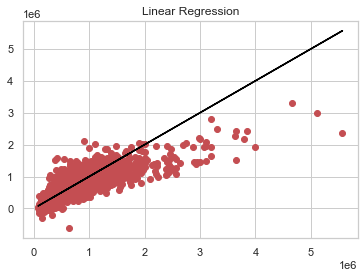

In [68]:
plt.scatter(y_test, pred_mlr,color="r")
plt.title("Linear Regression")
plt.plot(y_test, y_test,color='black')
plt.show()

In [70]:
print('Module score = ', round(metrics.r2_score(y_test, pred_mlr)*100),'%')

Module score =  66 %


It shows an interesting value since it's better than the linear one so, we can conclude that Multi_linear regression is definitely better than the other type, which can be explained by the increased amount of inputs having new dimensions to work on. 

### POLYNOMIAL REGRESSION

In [71]:
poly = PolynomialFeatures(degree=4)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)
mlr.fit(x_train_poly, y_train)

LinearRegression()

In [74]:
score_poly = mlr.score(x_train_poly, y_train)
score_poly

0.8025359057421038

In [75]:
print('Module score = ', round((score_poly)*100),'%')

Module score =  80 %


Finally, Polynomial regression shows the best score up to 80% it's better than Multi-linear regression.